Imagine that you’re an up-and-coming coder looking for your big break. Yesterday, you got a phone call from a major bank in Germany. A few hours later you found yourself flying across the ocean on a transcontinental jet! This could be your chance to make your name in AI machine learning. You leaned your seat forward and studied the materials that the bank sent you.
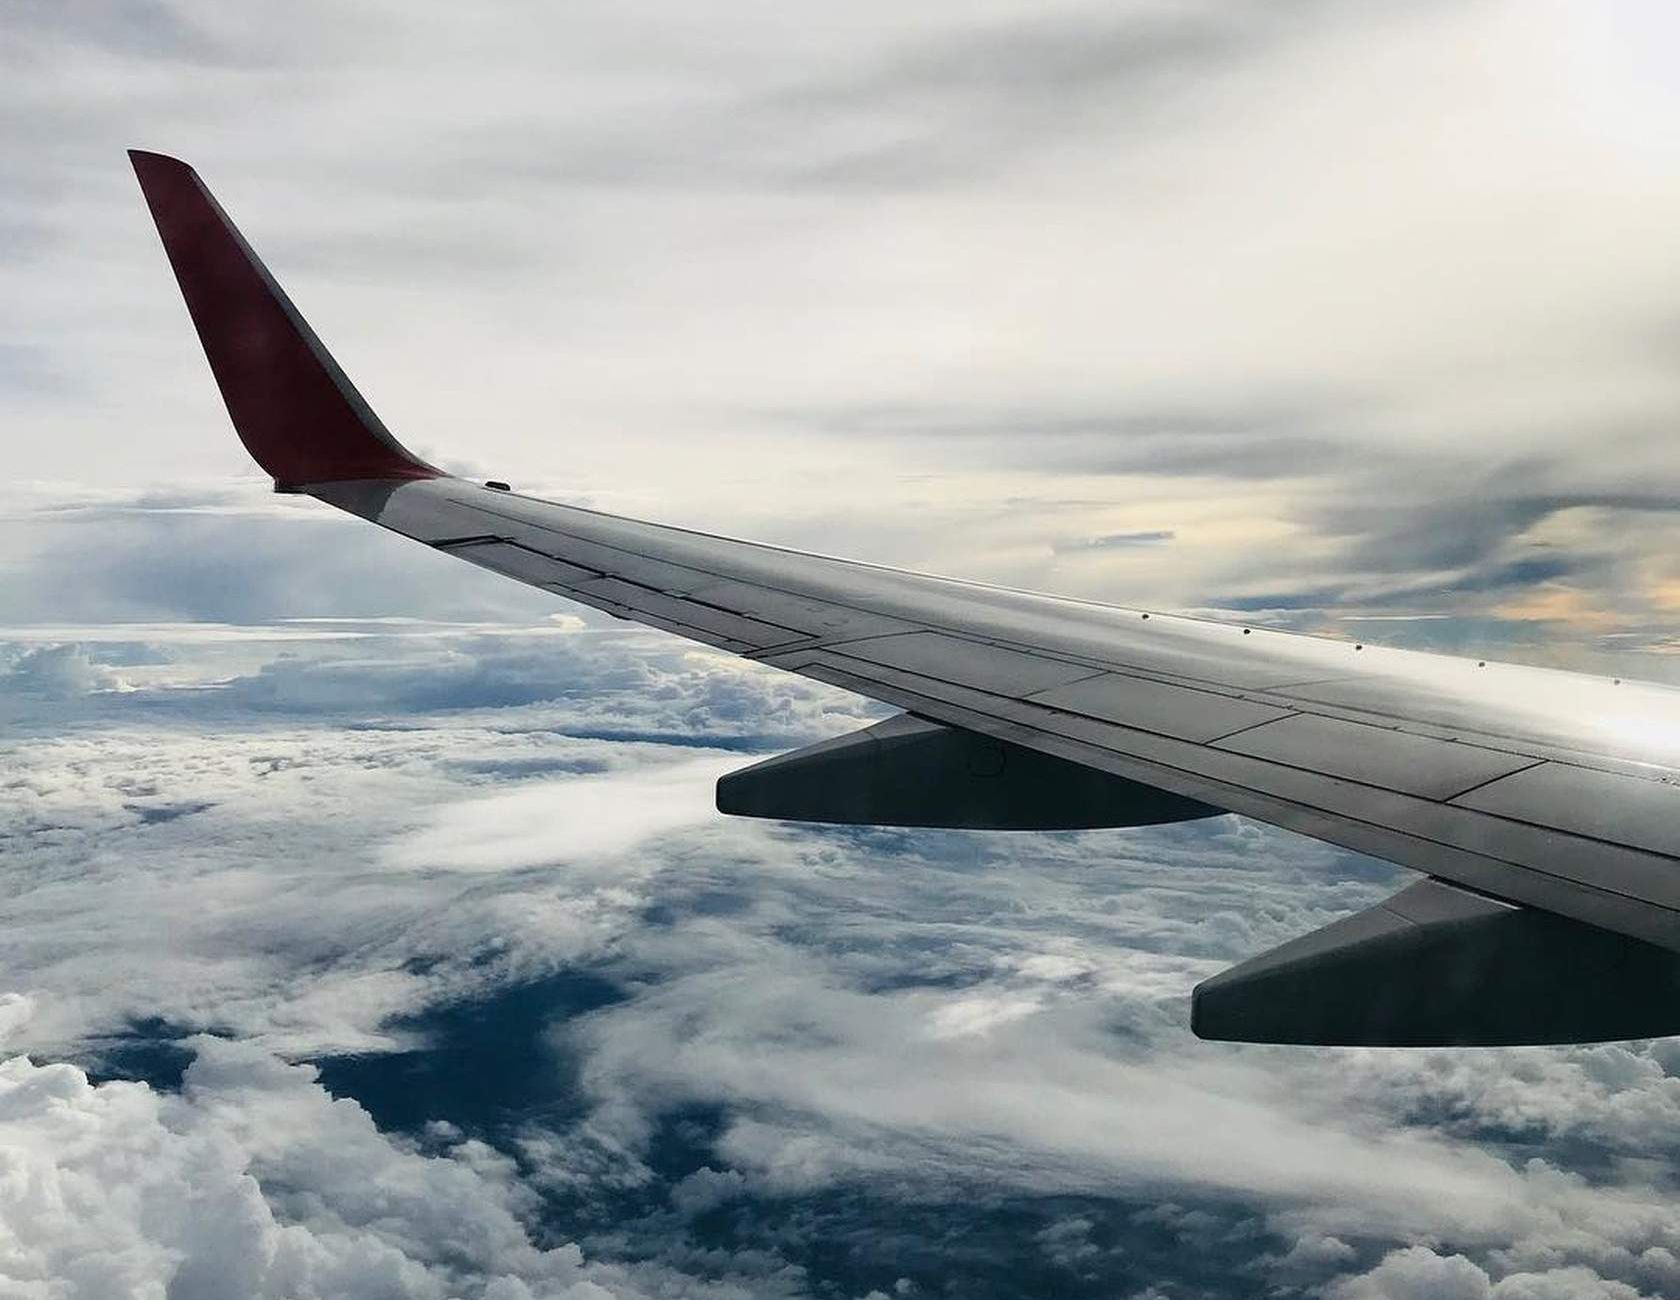

<b><u>A terrific opportunity</u></b><br>
The bank wants to protect itself from the risk of making loans that are never repaid.
<ul>
<li>It’s preparing to launch a new website on which customers can submit requests for loans up to €10,000 and, if their credit is sound, get instant approval.</li>
<li>The good news is that this will attract customers who want to apply for loans quickly, without a lot of fuss.</li>
<li>The bad news is that it will give the bank almost no time to investigate each applicant’s credit risk, then reject those who might default on their loan, ultimately costing the bank millions of euros.</li>
</ul>
    The bank wants you to lead the development of an AI machine learning system that can rapidly predict the risk of granting a loan for each customer who applies.

<b><u>The scope of your experiment</u></b><br>
<p>You'll build an AI machine learning model, train algorithms on the same data set of bank loans and defaults, then test them competitively, using additional data, to see which predicts defaults most accurately.</p>

<b><u>Your data set</u></b>
<ul>
    <li>You’ll use data from a real German bank that’s fictionalized for this simulation.</li>
    <li>The file contains records of five thousand past loans.</li>
<li>Each record includes ample data such as the customer’s credit rating, bank account balances, loan purpose, and more—and whether the borrower paid or defaulted on the loan.</li>
</ul>

## Your to-do list
<ol>
    <li>Set up a new project.</li>
<li>Create a learning model designed to predict whether an applicant is more likely to pay back or default on a loan.</li>
    <li>Train your model on 90% of your data set, including loan outcomes.</li>
<li>Test the model on a test set of data (the remaining 10% of the data in the data set) to see which algorithm gives the best predictions.</li>
    <li>Save the final model with highest confidence as a Jupyter notebook.</li>
    </ol>

In [34]:
#importing all the required packages
import pandas as pd
import sklearn as sk
import numpy as np
import os.path

In [35]:
GermanCredit = pd.read_csv('german_credit_data_biased_training.csv')
GermanCredit.head()

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,savings_insurance,37,stores,own,2,skilled,1,none,yes,No Risk
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,real_estate,28,none,own,2,skilled,1,yes,no,No Risk
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,unknown,57,none,own,2,skilled,1,none,yes,Risk


In [36]:
GermanCredit.columns


Index(['CheckingStatus', 'LoanDuration', 'CreditHistory', 'LoanPurpose',
       'LoanAmount', 'ExistingSavings', 'EmploymentDuration',
       'InstallmentPercent', 'Sex', 'OthersOnLoan', 'CurrentResidenceDuration',
       'OwnsProperty', 'Age', 'InstallmentPlans', 'Housing',
       'ExistingCreditsCount', 'Job', 'Dependents', 'Telephone',
       'ForeignWorker', 'Risk'],
      dtype='object')

In [37]:
GermanCredit.shape

(5000, 21)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

In [39]:
# Preprocessing
X = GermanCredit.drop(columns=['Risk'])
y = GermanCredit['Risk']

In [40]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [41]:
# Define preprocessing steps for categorical and numerical columns
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

In [42]:
# Define models
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()

In [43]:
# Pipelines
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_model)
])

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])


In [45]:
# Train and evaluate RandomForestClassifier
rf_pipeline.fit(X_train, y_train)
rf_y_pred = rf_pipeline.predict(X_test)
print("Random Forest Classifier:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))
print("Classification Report:")
print(classification_report(y_test, rf_y_pred))

Random Forest Classifier:
Confusion Matrix:
[[281  39]
 [ 78 102]]
Classification Report:
              precision    recall  f1-score   support

     No Risk       0.78      0.88      0.83       320
        Risk       0.72      0.57      0.64       180

    accuracy                           0.77       500
   macro avg       0.75      0.72      0.73       500
weighted avg       0.76      0.77      0.76       500



In [47]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train and evaluate XGBoost Classifier
xgb_pipeline.fit(X_train, y_train_encoded)
xgb_y_pred = xgb_pipeline.predict(X_test)

# Decode predictions
xgb_y_pred_decoded = label_encoder.inverse_transform(xgb_y_pred)

print("XGBoost Classifier:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_y_pred_decoded))
print("Classification Report:")
print(classification_report(y_test, xgb_y_pred_decoded))

XGBoost Classifier:
Confusion Matrix:
[[271  49]
 [ 80 100]]
Classification Report:
              precision    recall  f1-score   support

     No Risk       0.77      0.85      0.81       320
        Risk       0.67      0.56      0.61       180

    accuracy                           0.74       500
   macro avg       0.72      0.70      0.71       500
weighted avg       0.74      0.74      0.74       500



In [48]:
# Save the final model with highest confidence as a Jupyter notebook
# You can save the model using joblib or pickle
import joblib

In [49]:
# Save RandomForestClassifier model
joblib.dump(rf_pipeline, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [50]:
# Save XGBoost Classifier model
joblib.dump(xgb_pipeline, 'xgboost_model.pkl')

['xgboost_model.pkl']

In [55]:
from sklearn.metrics import accuracy_score

# Convert numerical predictions to string labels
y_pred_string = label_encoder.inverse_transform(xgb_y_pred)

# Calculate accuracy score
xgb_accuracy = accuracy_score(y_test, y_pred_string)

print("XGBoost Classifier Accuracy:", xgb_accuracy)
print("Random Forest Classifier Accuracy:", rf_accuracy)

if rf_accuracy > xgb_accuracy:
    print("Random Forest Classifier is more accurate.")
else:
    print("XGBoost Classifier is more accurate.")

XGBoost Classifier Accuracy: 0.742
Random Forest Classifier Accuracy: 0.766
Random Forest Classifier is more accurate.
